In [ ]:
import seaborn as sns

# Seaborn

- Figure-level vs axes-level functions 
- Figure level plots have legend outside the plot 
- Axes level plots plot data into a single matplotlib.pyplot.Axes object. 

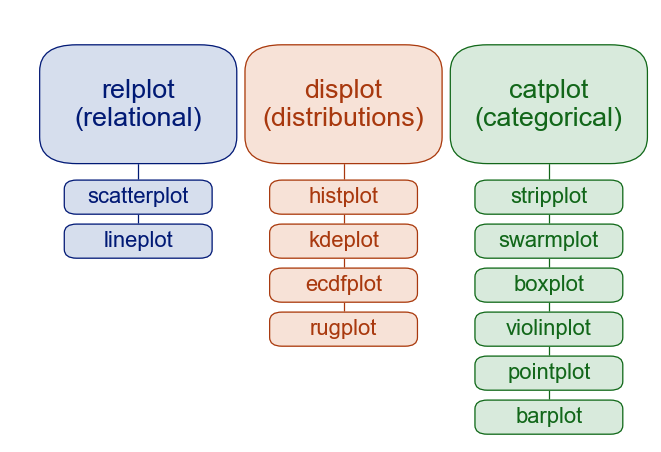

Can use the displot, which by defualt has kind=histogram

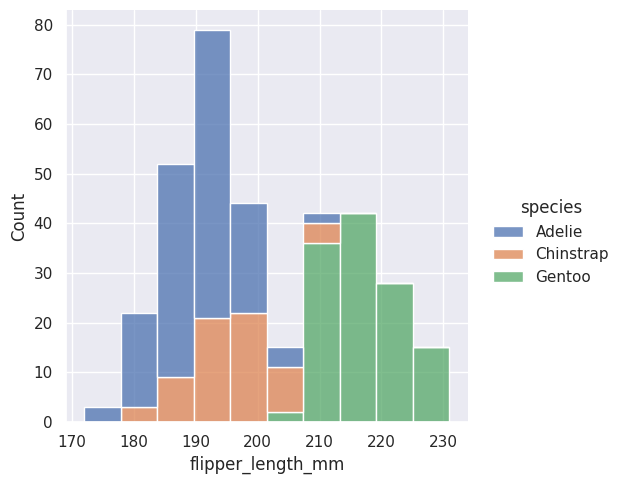

In [10]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Changing only kind="kde":

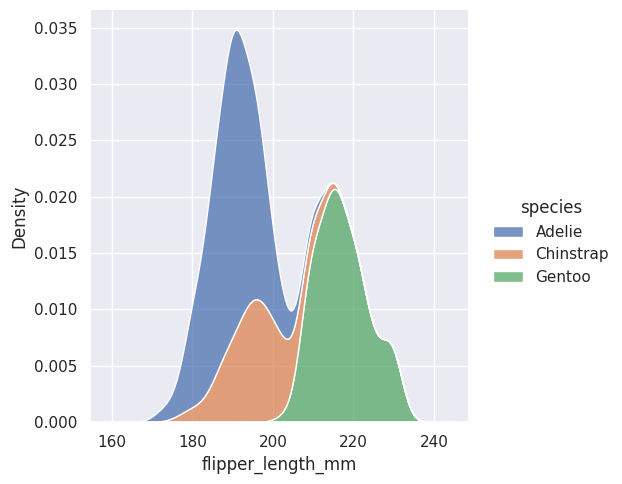

In [11]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

By removing the multiple="stack" argument, it creates a figure wuth multiple subplots. Handling sns grid objects / matplotlib back end stuff. Figure level functions are good for multiple subplots situations

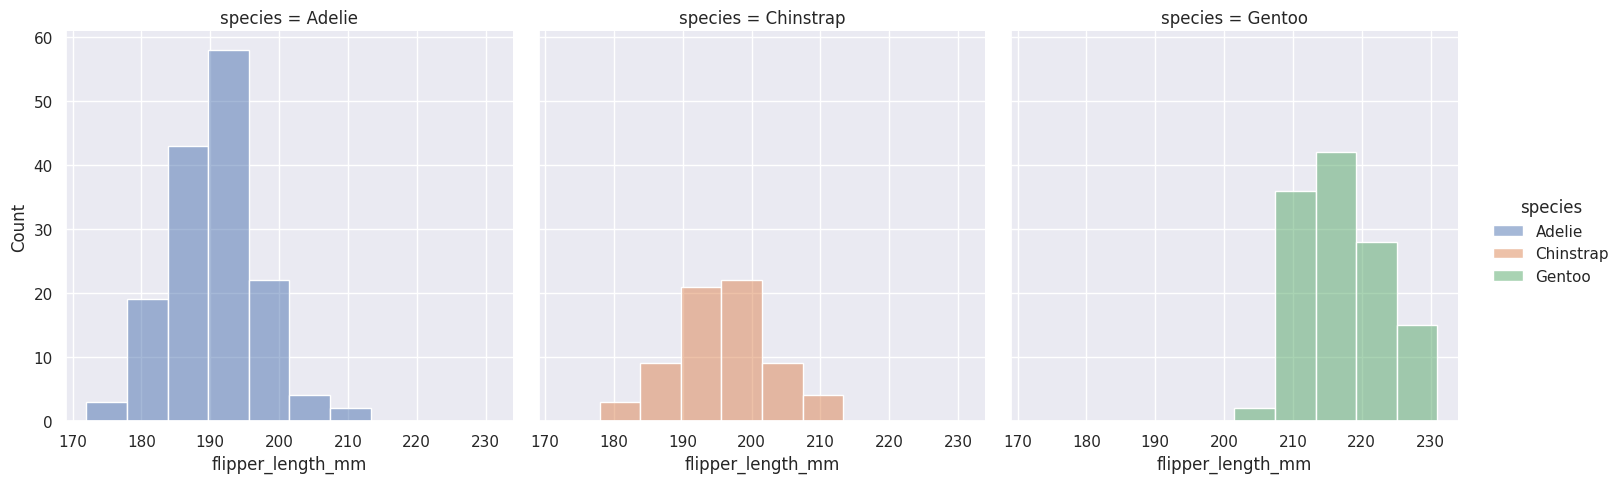

In [13]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In constrast axes-level functions make self contained plots. 

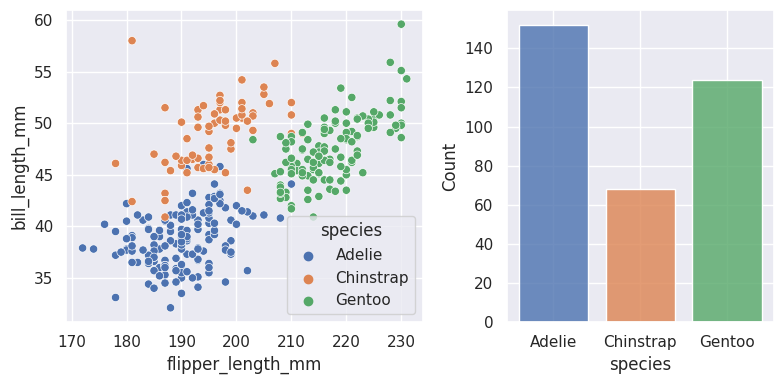

In [15]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

These require us handling the layout ourselves, specifiying the axis argument in both function calls. It does allow lots of customizability. Figure-level functions are not so easily composed with other plots.

Figure level plots return the matplotlib axes:

<class 'seaborn.axisgrid.FacetGrid'>
AxesSubplot(0.148,0.1395;0.816x0.8245)


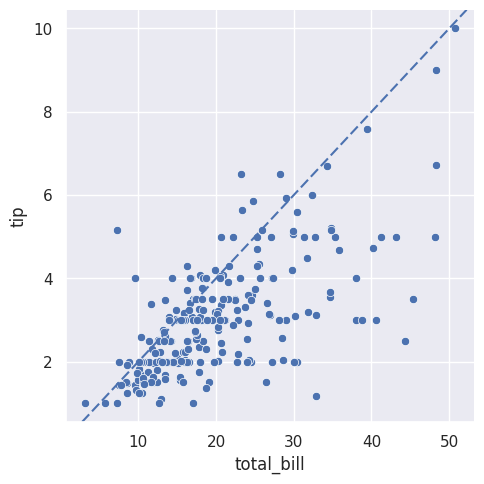

In [19]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
print(type(g))
print(g.ax)
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

<br>

Sizing figures:

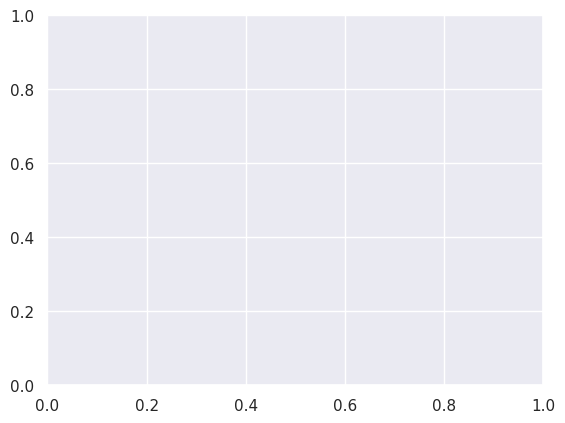

In [20]:
f, ax = plt.subplots()

The sizing of figures differs between axis level and figure level plots. 
- Axis level plots are similar to maplotlib in that they are based on size of figure and axis layout
- Figure level plots have parameters for width and hieght, and these specify size of each subplot. 

A figure with multiple columns in matplotlib will remain same size. (FIgure size remains same, axis layout changes):

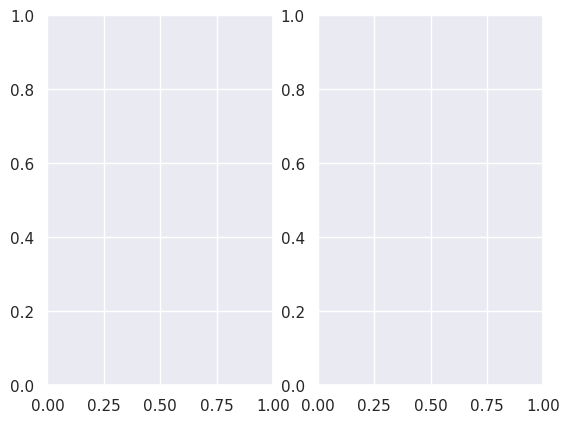

In [ ]:
f, ax = plt.subplots(1,2)

In constrats a figure-level function will be square, as it is based on the size of the subplot:

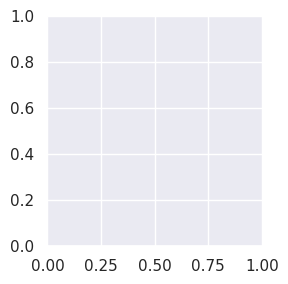

In [23]:
g = sns.FacetGrid(penguins)

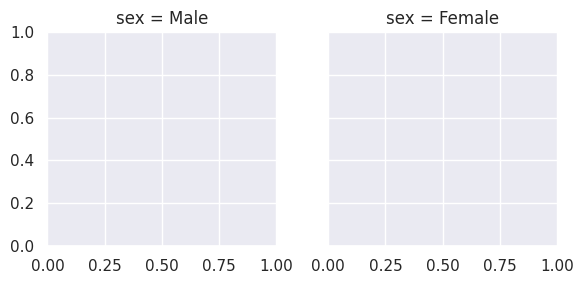

In [24]:
g = sns.FacetGrid(penguins, col="sex")

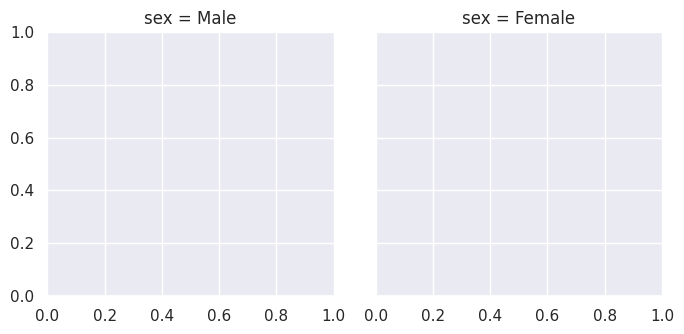

In [31]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=1)

In [ ]:
b

Combining multiple Views onf data 

Don't fit in with the above schema. Both are figure level functions and create multiple subplots by default, but they use different objects, the JointGrid and PairGrid respectively. 
- jointplot
- pairplot 

In [ ]:

f, ax = plt.subplots(1, 2, sharey=True)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


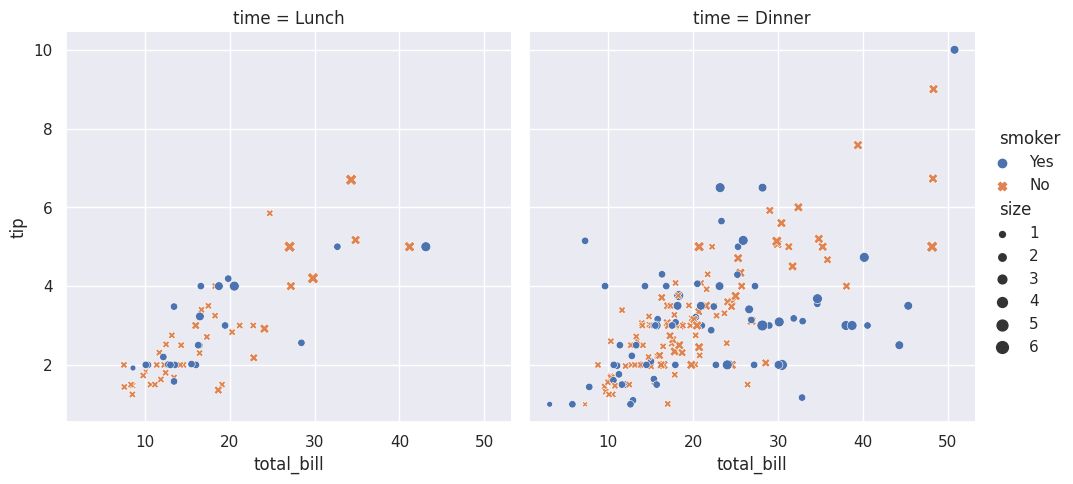

In [8]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

print(tips.columns)

# Create a visualization
sns.relplot(data=tips,x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")

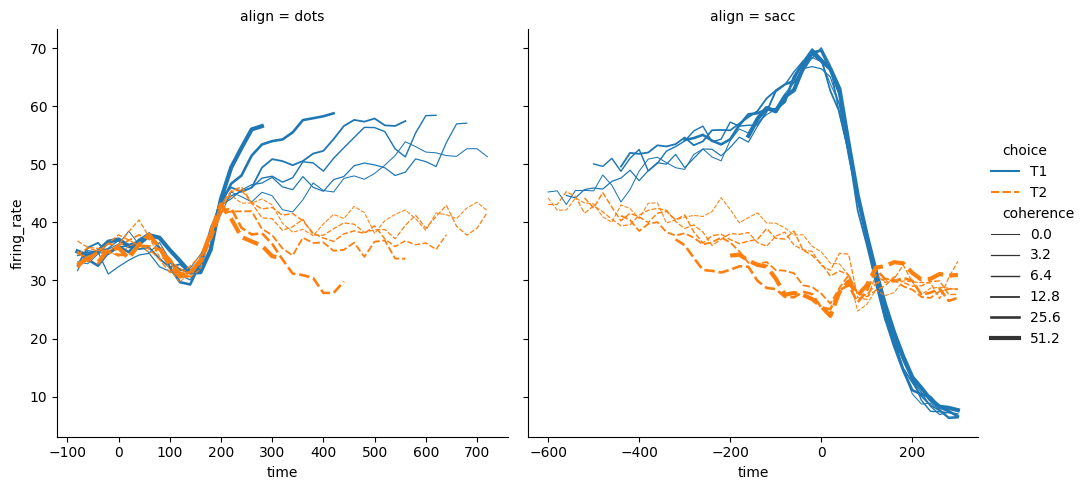

In [4]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

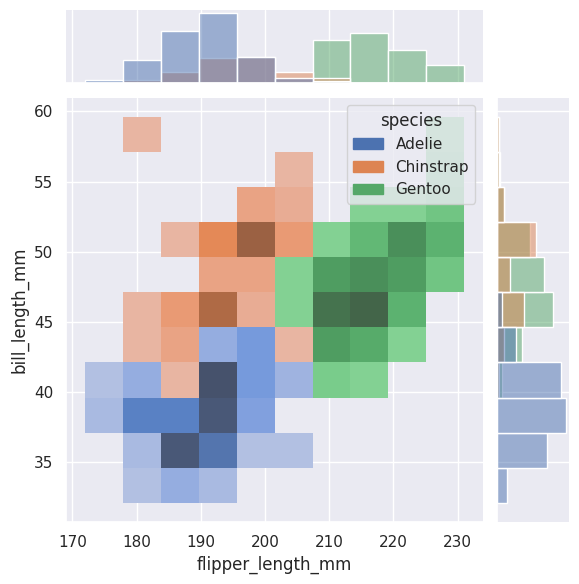

In [36]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

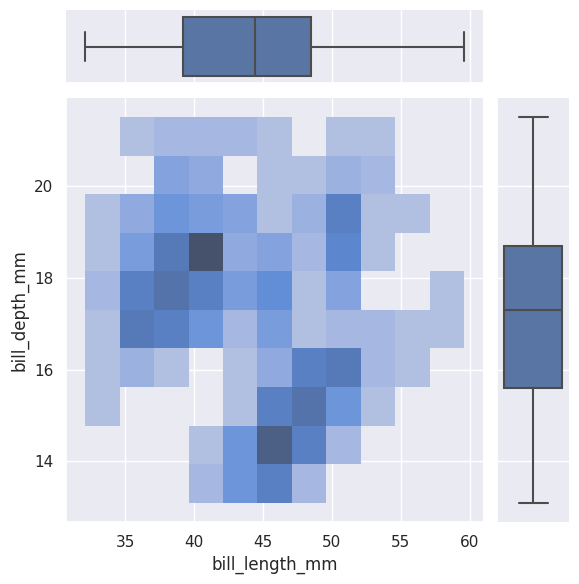

In [44]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)